In [5]:
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas

from IPython.display import clear_output, update_display

SelectMultiple(description='Index', index=(3, 19), options=('NIFTYPrivateBank', 'NIFTYMidcap50', 'NIFTYMedia',…

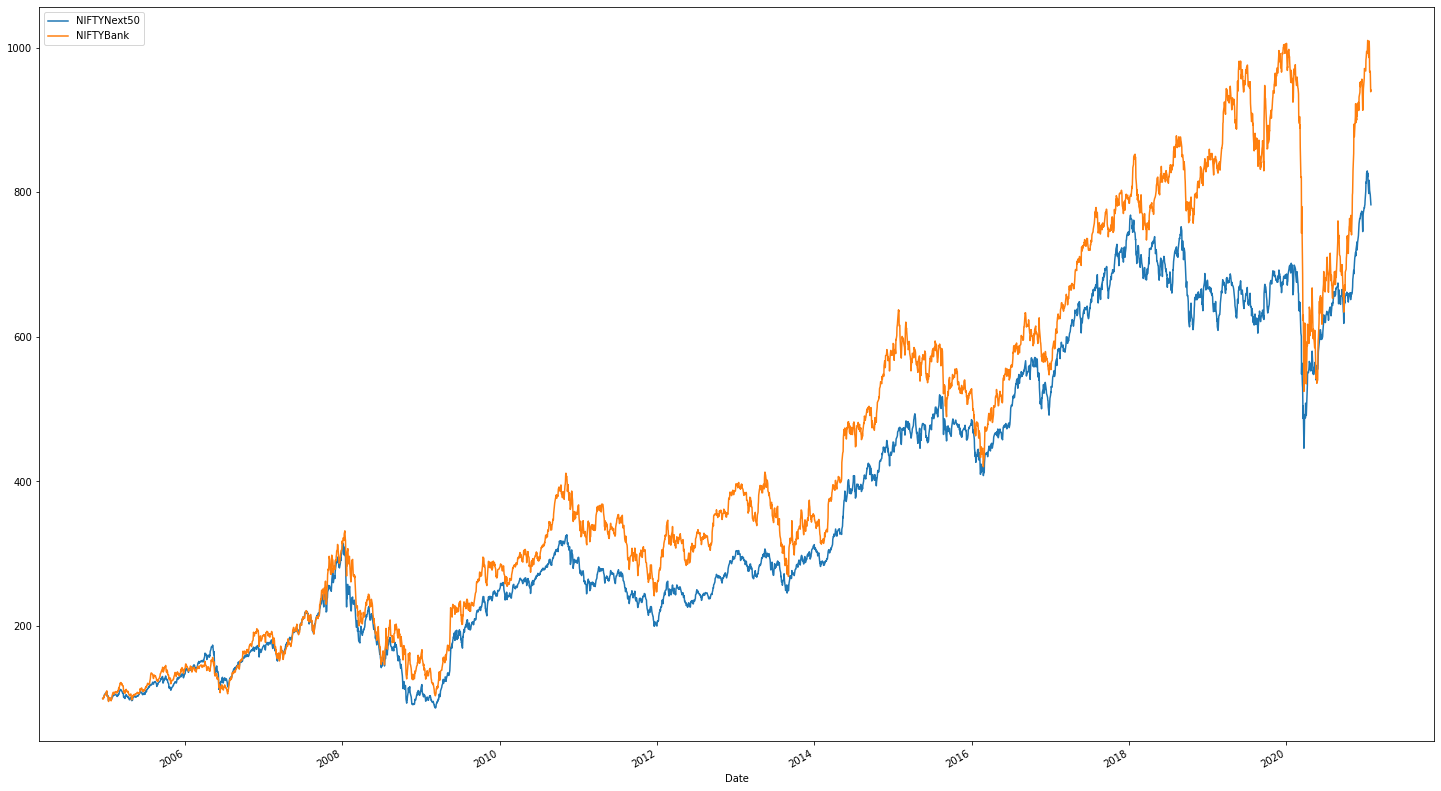

In [8]:
def get_data(sector_name):
    df = pandas.read_csv(f'Data/{sector_name}_Data.csv')
    df = df.drop(columns=["Open", "High", "Low"])
    n = 4000
    df = df.head(n=n) # 2004-5
    df['Date'] = df['Date'].astype('datetime64')
    size = len(df['Close']) - 1
    first = df['Close'][n-1]
    df['Close'] = df['Close']*100/first
    df = df.rename(columns={"Close": sector_name})
    return df

list_of_files = os.listdir('Data')
sector_options = [sector.split('_Data.')[0] for sector in list_of_files]
list_of_sectors = []
w = widgets.SelectMultiple(
    options=sector_options,
    value=list_of_sectors,
    description='Index',
    disabled=False
)
init_counter = 0
p_df = None
def on_dropdown_change(change):
    global p_df
    global init_counter
    global list_of_sectors
    if change['name'] == 'value' and (change['new'] != change['old']):
        list_of_sectors = change['new']
        
        for sector in list_of_sectors:
            if p_df is None:
                p_df = get_data(sector)
            if p_df is not None:
                if sector not in p_df.columns:
                    df = get_data(sector)
                    for column in df.columns:
                        if column != 'Date':
                            p_df[column] = df[column]
            for column in p_df.columns:
                if column not in list_of_sectors:
                    if column != 'Date':
                        p_df = p_df.drop(columns=[column])
                

        graph = p_df.plot(x='Date', y=[column for column in p_df.columns[1:]], figsize=(25,15))
                    
        clear_output()
        display(graph, display_id='graph')
        display(w, display_id='selectbox')
        

w.observe(on_dropdown_change)

display(w, display_id='selectbox')